In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
df = pd.read_csv("../data/raw/non_rand_discount.csv",sep=";")

In [3]:
# module 1: Estimating the Profitability of Discounts

In [4]:
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   spend_1m_baby          15000 non-null  int64  
 1   spend_2m_baby          15000 non-null  int64  
 2   spend_3m_baby          15000 non-null  int64  
 3   spend_4m_baby          15000 non-null  int64  
 4   spend_5m_baby          15000 non-null  int64  
 5   spend_6m_baby          15000 non-null  float64
 6   spend_1m_clothes       15000 non-null  int64  
 7   spend_2m_clothes       15000 non-null  float64
 8   spend_3m_clothes       15000 non-null  float64
 9   spend_4m_clothes       15000 non-null  float64
 10  spend_5m_clothes       15000 non-null  float64
 11  spend_6m_clothes       15000 non-null  float64
 12  spend_1m_health        15000 non-null  int64  
 13  spend_2m_health        15000 non-null  int64  
 14  spend_3m_health        15000 non-null  int64  
 15  sp

In [5]:
df.discount

0        US$ 125.0
1         US$ 75.0
2         US$ 50.0
3         US$ 10.0
4        US$ 100.0
           ...    
14995    US$ 110.0
14996    US$ 135.0
14997      US$ 0.0
14998    US$ 145.0
14999     US$ 30.0
Name: discount, Length: 15000, dtype: object

In [6]:
# defining a function that replaces US$ for nothing in order to get rid of the non-numerical values
def remove_symbols(discount):
  return float(discount.replace('US$ ', '')) 

In [7]:
remove_symbols("US$ 110.0")

110.0

In [8]:
df.discount = df.discount.apply(remove_symbols)


In [9]:
df2 = df[['sales','discount','profit','age','cust_state','tenure','sales_prediction_bins','sales_prediction']]
df2.head()

,sales,discount,profit,age,cust_state,tenure,sales_prediction_bins,sales_prediction
0,3368.64,125.0,40.06,40,MA,6,8,1351.024765
1,2133.10,75.0,29.52,36,MG,10,4,1035.580387
2,2001.62,50.0,48.08,34,RJ,7,3,992.401825
3,1461.96,10.0,61.64,31,BA,7,1,919.720735
4,2743.72,100.0,34.44,32,PB,6,6,1176.485681


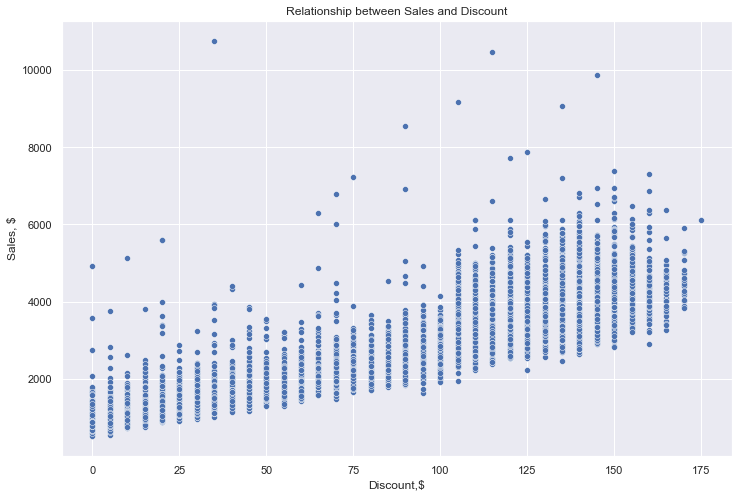

In [10]:
# relationship between discount and sales
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="sales", data=df)
plt.ylabel('Sales, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Sales and Discount')
plt.show()

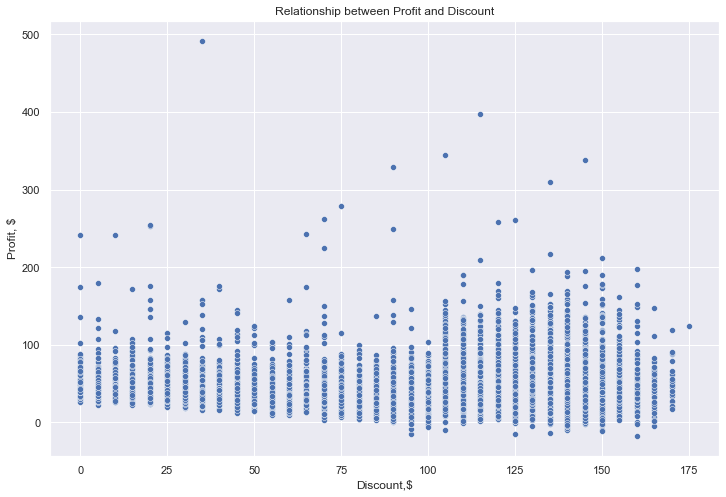

In [11]:
# relationship between discount and profits 
# profit increase with discount
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="profit", data=df)
plt.ylabel('Profit, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Profit and Discount')
plt.show()

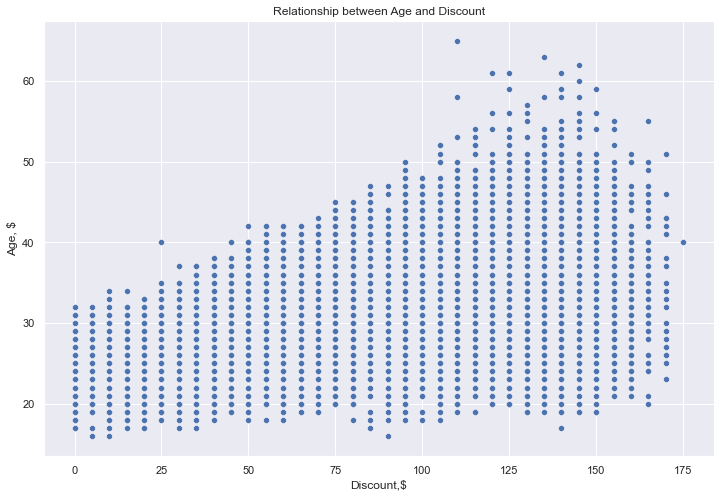

In [12]:
# relationship between age and discount
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="age", data=df)
plt.ylabel('Age, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Age and Discount')
plt.show()

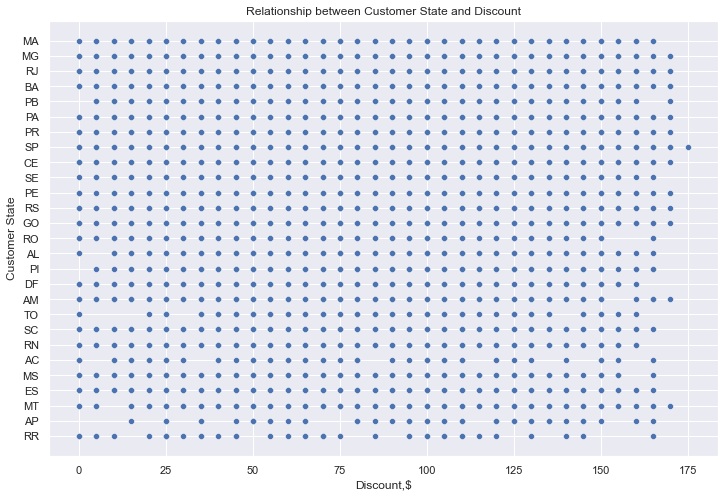

In [13]:
# relationship between age and discount
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="cust_state", data=df)
plt.ylabel('Customer State')
plt.xlabel('Discount,$')
plt.title('Relationship between Customer State and Discount')
plt.show()

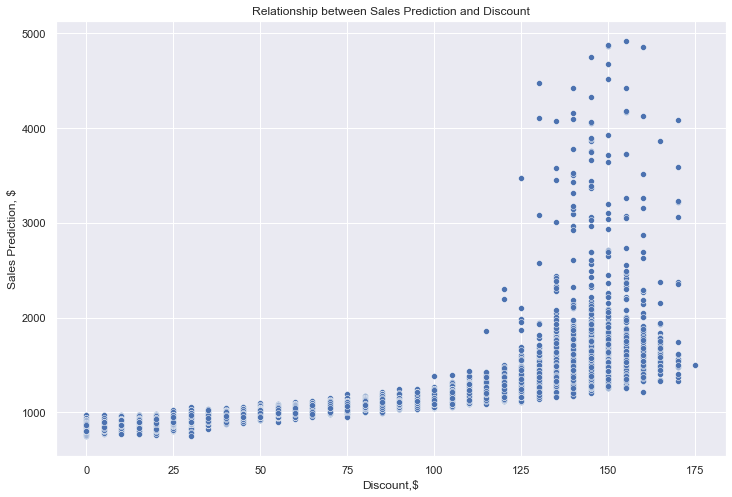

In [14]:
# relationship between sales prediction and discount
# from what we can observe it looks like sales prediction is a big driver of discounts
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="sales_prediction", data=df)
plt.ylabel('Sales Prediction, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Sales Prediction and Discount')
plt.show()

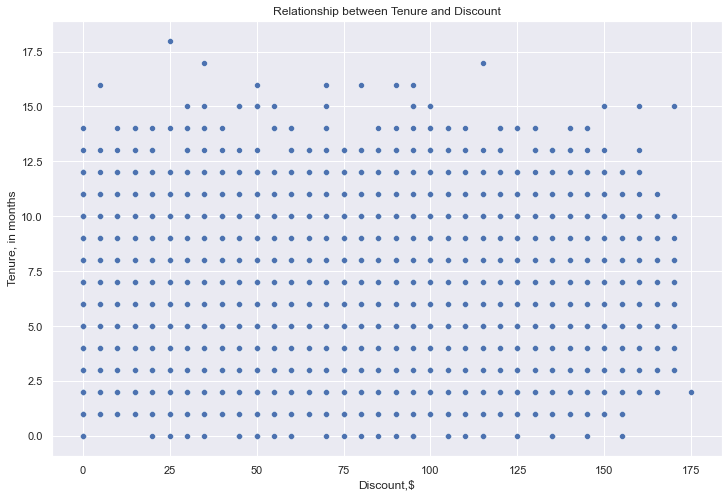

In [15]:
# relationship between tenure and discount
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="tenure", data=df)
plt.ylabel('Tenure, in months')
plt.xlabel('Discount,$')
plt.title('Relationship between Tenure and Discount')
plt.show()

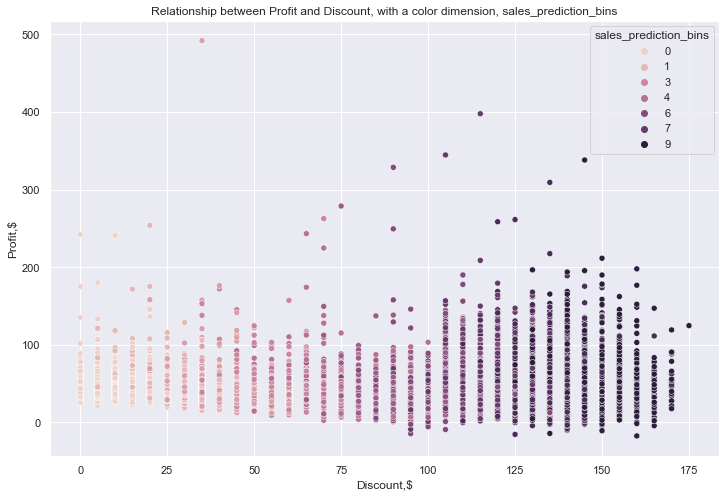

In [16]:
# relationship between profits and discounts, adding a color dimension, which is sales_prediction_bins
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="profit",hue="sales_prediction_bins", data=df)
plt.ylabel('Profit,$')
plt.xlabel('Discount,$')
plt.title('Relationship between Profit and Discount, with a color dimension, sales_prediction_bins')
plt.show()

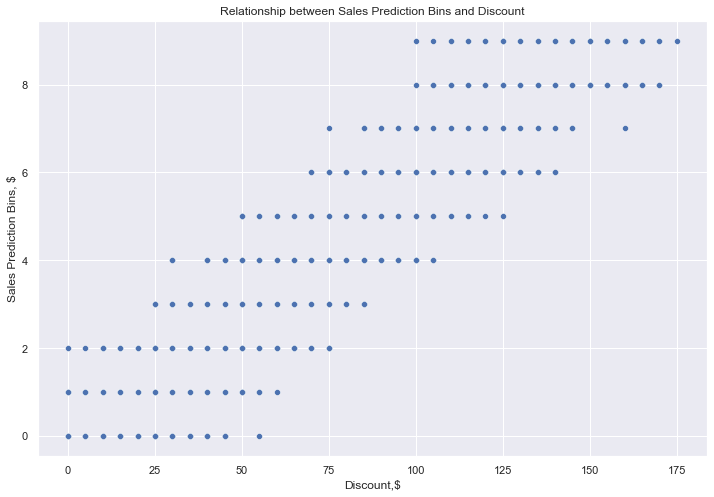

In [17]:
# This is not correct?
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="sales_prediction_bins", data=df)
plt.ylabel('Sales Prediction Bins, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Sales Prediction Bins and Discount')
plt.show()

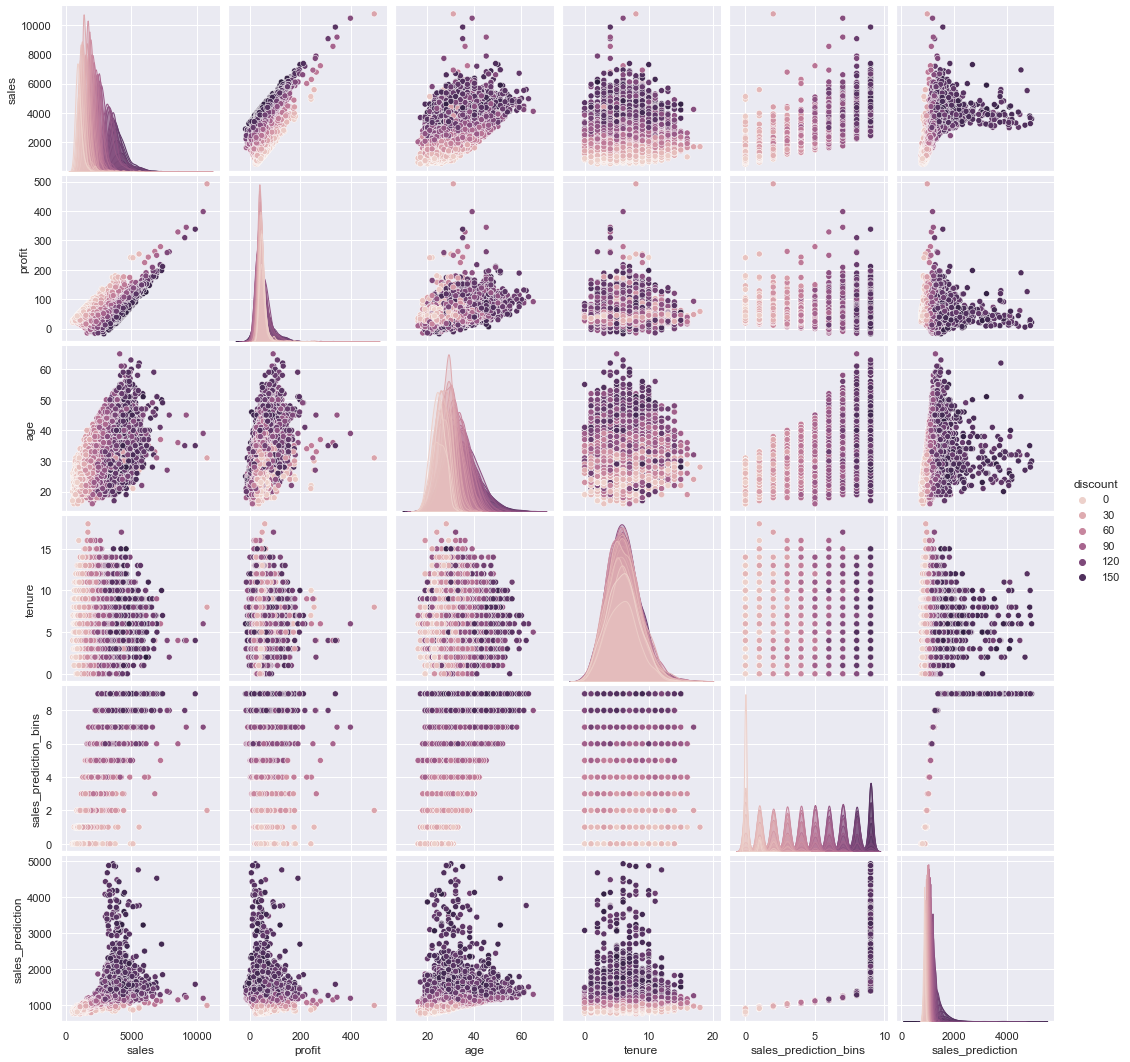

In [18]:
# Interesting comparison between df2 parameters and discount
sns.pairplot(df2, hue='discount')
plt.show()

In [19]:
# Looking at the regression of discount on sales we can expect to ___ for each additional unit of discount.
mod = smf.ols(formula='sales ~ discount', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 6.341e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:12:08   Log-Likelihood:            -1.1363e+05
No. Observations:               15000   AIC:                         2.273e+05
Df Residuals:                   14998   BIC:                         2.273e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    804.5246      7.790    103.274      0.0

In [20]:
discount = np.array([0,175])
sales = 21.9248*discount + 804.5246

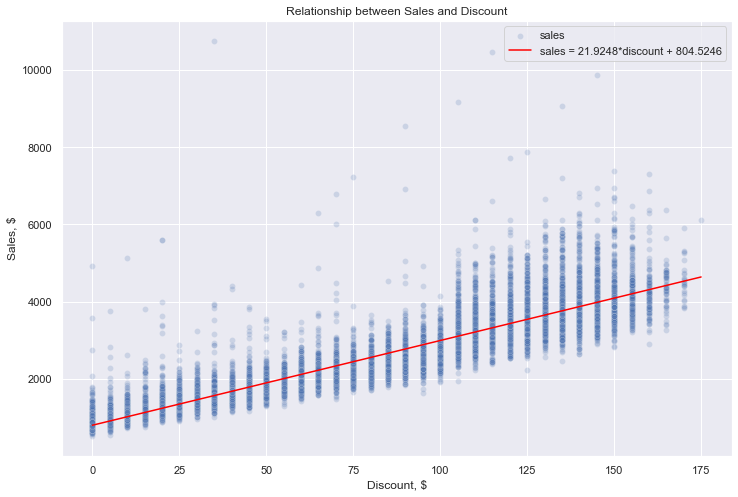

In [21]:
# It is a good fit since R-squared is 0.809, which is pretty close to 1 and the linear regresion graph confirms it
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="sales", data=df, alpha=0.2, label='sales')
sns.lineplot(x=discount,y=sales, color='red', alpha=1, label='sales = 21.9248*discount + 804.5246')
plt.ylabel('Sales, $')
plt.xlabel('Discount, $')
plt.legend()
plt.title('Relationship between Sales and Discount')
plt.show()

In [22]:
# Looking at the regression of discount on profits we can expect to ___ for each additional unit of discount.
mod = smf.ols(formula='profit ~ discount', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     303.4
Date:                Wed, 06 Jul 2022   Prob (F-statistic):           2.71e-67
Time:                        17:12:08   Log-Likelihood:                -68395.
No. Observations:               15000   AIC:                         1.368e+05
Df Residuals:                   14998   BIC:                         1.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.4217      0.382    103.274      0.0

In [23]:
discount = np.array([0,175])
profit = 0.0743*discount + 39.4217

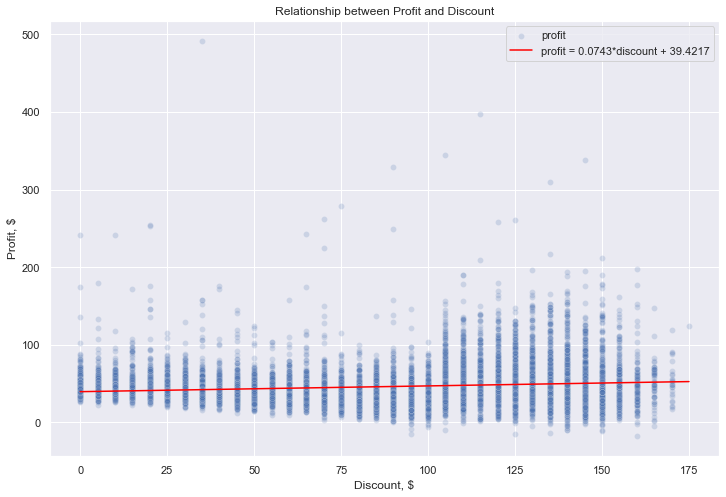

In [24]:
# Although the linear regresion graph says that it is a good fit, R-squared is pretty close to 0. This gives us strong reasons to believe this positive relationship is biased since we are giving more discounts to customers which we already expect to buy more. 
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount", y="profit", data=df, alpha=0.2, label='profit')
sns.lineplot(x=discount,y=profit, color='red', alpha=1, label='profit = 0.0743*discount + 39.4217')
plt.ylabel('Profit, $')
plt.xlabel('Discount, $')
plt.legend()
plt.title('Relationship between Profit and Discount')
plt.show()

In [25]:
# Looking at the regression of sales_prediction and age on discount we can expect discounts to change ___ as age and sales_prediction changes
mod = smf.ols(formula='discount ~ sales_prediction + age', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                 1.176e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:12:08   Log-Likelihood:                -71057.
No. Observations:               15000   AIC:                         1.421e+05
Df Residuals:                   14997   BIC:                         1.421e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -102.3049      1.299  

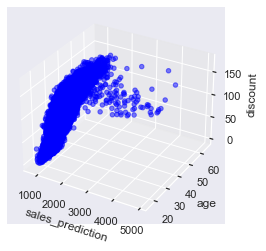

In [26]:
model = smf.ols(formula='discount ~ sales_prediction + age', data=df2)
results_formula = model.fit()
results_formula.params
x_surf, y_surf = np.meshgrid(np.linspace(df2.sales_prediction.min(),df2.sales_prediction.min(),100),np.linspace(df2.age.min(),df2.age.min(),100))
onlyX = pd.DataFrame({'sales_prediction':x_surf.ravel(),'age':y_surf.ravel()})
fittedY = results_formula.predict(exog=onlyX)
fittedY = np.array(fittedY)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(df2['sales_prediction'],df2['age'],df2['discount'],c='blue',marker='o',alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape),color='None',alpha=0.3)
ax.set_xlabel('sales_prediction')
ax.set_ylabel('age')
ax.set_zlabel('discount')
plt.show()


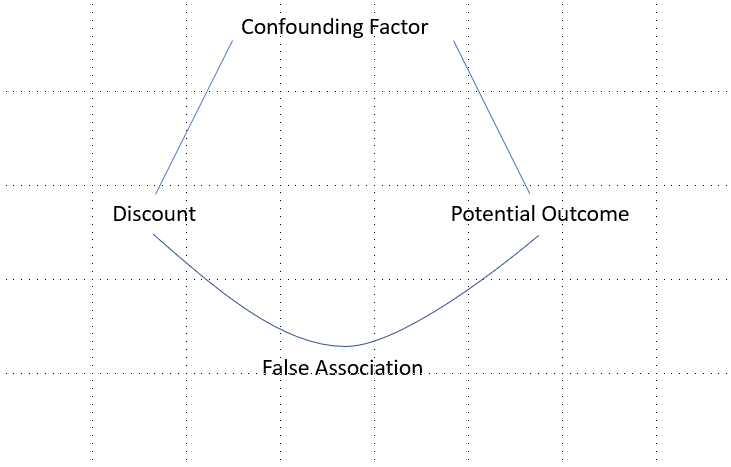

In [27]:
# Draw a causal graph that is in line with our understanding of the bias in this relationship (between discount and potential outcome)
Image("../reports/Figures/Confounding Factor.png")



In [28]:
# In order to estimate the impact of discounts on profits, we have to compare customers with the same sales predictions.


In [29]:
def prediction_naming(sales_prediction_bins):
    if sales_prediction_bins >= 0 and sales_prediction_bins <= 3:
        naming = 'Low'
    if sales_prediction_bins >= 4 and sales_prediction_bins <= 6:
        naming = 'Mid'
    if sales_prediction_bins >= 7 and sales_prediction_bins <= 9:
        naming = 'High'
    return naming
    

In [30]:
df2

,sales,discount,profit,age,cust_state,tenure,sales_prediction_bins,sales_prediction
0,3368.64,125.0,40.06,40,MA,6,8,1351.024765
1,2133.10,75.0,29.52,36,MG,10,4,1035.580387
2,2001.62,50.0,48.08,34,RJ,7,3,992.401825
3,1461.96,10.0,61.64,31,BA,7,1,919.720735
4,2743.72,100.0,34.44,32,PB,6,6,1176.485681
...,...,...,...,...,...,...,...,...
14995,4440.30,110.0,107.57,40,SP,2,6,1126.246160
14996,3009.38,135.0,12.46,33,PI,10,6,1158.199897
14997,881.77,0.0,43.21,23,SP,3,0,800.147253
14998,4385.49,145.0,69.89,43,BA,4,9,1385.466520


In [31]:
df2['prediction_naming'] = df2['sales_prediction_bins'].apply(prediction_naming)

C:\Users\Oscar\AppData\Local\Temp\ipykernel_21068\389715462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prediction_naming'] = df2['sales_prediction_bins'].apply(prediction_naming)


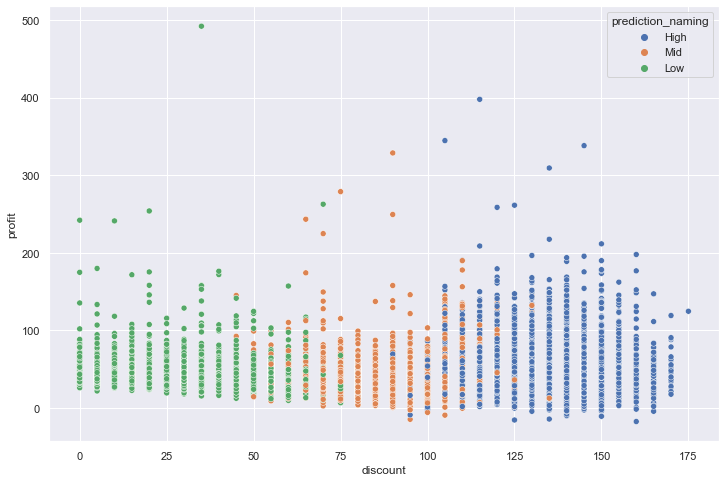

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='discount', y='profit', data=df2, hue='prediction_naming')
plt.show()

In [33]:
mod = smf.ols(formula='discount ~ C(sales_prediction_bins)', data=df2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               discount   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 2.552e+04
Date:                Wed, 06 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:12:10   Log-Likelihood:                -57189.
No. Observations:               15000   AIC:                         1.144e+05
Df Residuals:                   14990   BIC:                         1.145e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [34]:
# Create a new dataframe df_discount_res that is the original one plus a column with the above model's discount residual, plus the discounts average
df_discount_res = df2.copy()
df_discount_res['discount_res'] = df_discount_res["discount"] - res.predict(df2) + df_discount_res["discount"].mean()

In [35]:
df_discount_res.head()

,sales,discount,profit,age,cust_state,tenure,sales_prediction_bins,sales_prediction,prediction_naming,discount_res
0,3368.64,125.0,40.06,40,MA,6,8,1351.024765,High,71.384333
1,2133.10,75.0,29.52,36,MG,10,4,1035.580387,Mid,82.337667
2,2001.62,50.0,48.08,34,RJ,7,3,992.401825,Low,73.231935
3,1461.96,10.0,61.64,31,BA,7,1,919.720735,Low,62.844333
4,2743.72,100.0,34.44,32,PB,6,6,1176.485681,Mid,76.787667


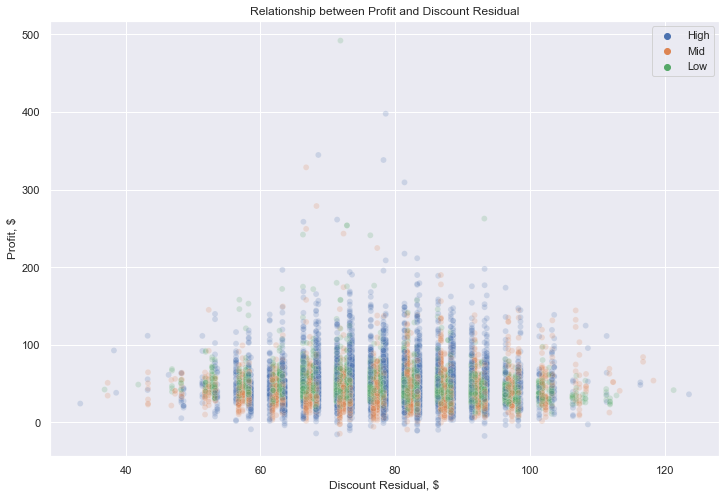

In [36]:
# Although the linear regresion graph says that it is a good fit, R-squared is pretty close to 0. This gives us strong reasons to believe this positive relationship is biased since we are giving more discounts to customers which we already expect to buy more. 
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount_res", y="profit", data=df_discount_res, alpha=0.2, hue='prediction_naming')
plt.ylabel('Profit, $')
plt.xlabel('Discount Residual, $')
plt.legend()
plt.title('Relationship between Profit and Discount Residual')
plt.show()

In [37]:
mod = smf.ols(formula='profit ~ C(sales_prediction_bins)', data=df2)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     106.7
Date:                Wed, 06 Jul 2022   Prob (F-statistic):          1.44e-194
Time:                        17:12:11   Log-Likelihood:                -68079.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14990   BIC:                         1.363e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [38]:
df_profit_res = df_discount_res.copy()
df_profit_res['profit_res'] = df_profit_res["profit"] - res.predict(df2) + df_profit_res["profit"].mean()

In [39]:
df_profit_res.head()

,sales,discount,profit,age,cust_state,tenure,sales_prediction_bins,sales_prediction,prediction_naming,discount_res,profit_res
0,3368.64,125.0,40.06,40,MA,6,8,1351.024765,High,71.384333,31.334318
1,2133.10,75.0,29.52,36,MG,10,4,1035.580387,Mid,82.337667,36.234138
2,2001.62,50.0,48.08,34,RJ,7,3,992.401825,Low,73.231935,52.963878
3,1461.96,10.0,61.64,31,BA,7,1,919.720735,Low,62.844333,61.915238
4,2743.72,100.0,34.44,32,PB,6,6,1176.485681,Mid,76.787667,35.959665


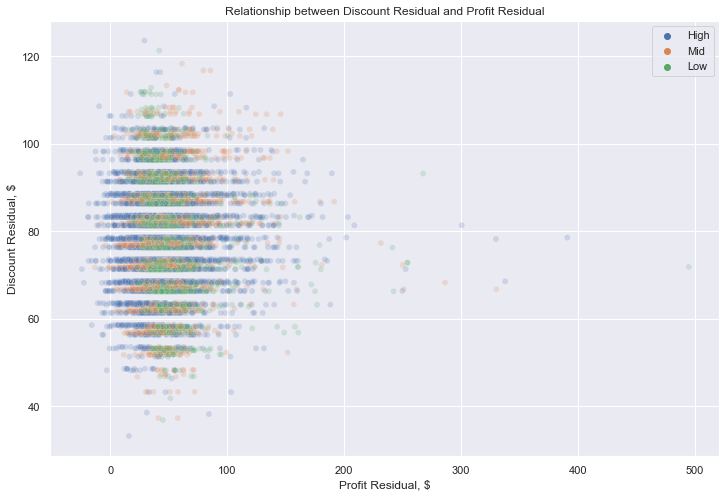

In [40]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="profit_res", y="discount_res", data=df_profit_res, alpha=0.2, hue='prediction_naming')
plt.ylabel('Discount Residual, $')
plt.xlabel('Profit Residual, $')
plt.legend()
plt.title('Relationship between Discount Residual and Profit Residual')
plt.show()

In [41]:
mod = smf.ols(formula='profit_res ~ discount_res', data=df_profit_res)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             profit_res   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.144
Date:                Wed, 06 Jul 2022   Prob (F-statistic):              0.143
Time:                        17:12:11   Log-Likelihood:                -68078.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14998   BIC:                         1.362e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       47.1222      1.325     35.556   

In [42]:
mod = smf.ols(formula='profit ~ discount + C(sales_prediction_bins)', data=df_profit_res)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     96.23
Date:                Wed, 06 Jul 2022   Prob (F-statistic):          5.30e-194
Time:                        17:12:11   Log-Likelihood:                -68078.
No. Observations:               15000   AIC:                         1.362e+05
Df Residuals:                   14989   BIC:                         1.363e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

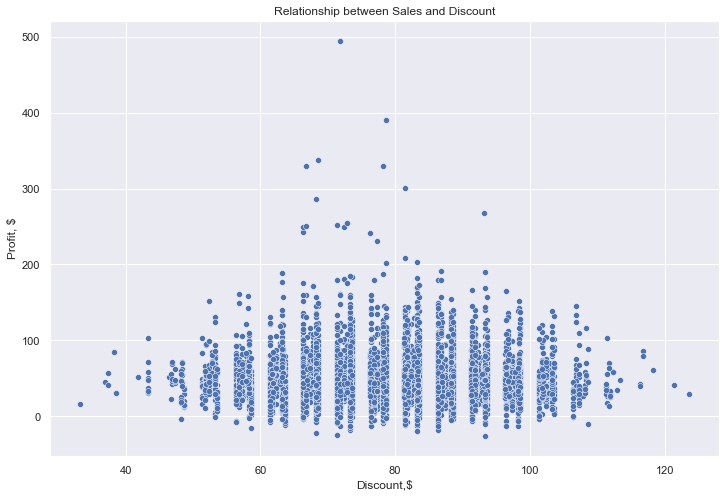

In [46]:
# 4.7
# relationship between discount and sales
# discounts are not working
plt.figure(figsize=(12,8))
sns.scatterplot(x="discount_res", y="profit_res", data=df_profit_res)
plt.ylabel('Profit, $')
plt.xlabel('Discount,$')
plt.title('Relationship between Sales and Discount')
plt.show()